# Project Description: Dự Đoán Giá Nhà

## Mô tả dữ liệu:

Dataset bao gồm 100 hàng và ba cột:

1. Width: Chiều rộng của ngôi nhà (tính bằng mét).

2. Length: Chiều dài của ngôi nhà (tính bằng mét).

3. Price: Giá bán của ngôi nhà (tính bằng triệu VND).

## Mục tiêu:

Xây dựng một mô hình Linear Regression dự đoán giá nhà dựa trên các đặc trưng về kích thước nhà, bao gồm chiều rộng (width) và chiều dài (length).

## Level 3 - Tự viết hàm Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

C:\Users\84909\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('C:/Users/84909/Linear Regression/Datasets/House_Price_2.csv')

## Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   width   100 non-null    int64  
 1   length  100 non-null    int64  
 2   price   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [4]:
X = df[['width','length']]
X.shape

(100, 2)

In [5]:
y = df['price']
y.shape

(100,)

## 4. Split the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
Z = np.concatenate([X_train, np.ones((X_train.shape[0], 1))], axis=-1)   ## thêm một cột vào sau X và gán vào Z

In [34]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Z.shape)

(80, 2)
(80, 1)
(20, 2)
(20, 1)
(80, 3)


## 5. Tạo hàm Gradient Descent

In [181]:
theta = np.zeros(Z.shape[1]).reshape(-1, 1)

def Gradient_Descent(X, y, epochs, learning_rate, theta):
    loss = 0
    for i in range(epochs):
        error = y - np.dot(X, theta)
        pre_theta = theta
        theta =  theta - 1/X.shape[0]* learning_rate * np.dot(-X.T, error)    

      #Condition
        pre_loss = loss
        loss = np.mean(np.square(y - np.dot(X, theta)))
        if abs(np.mean(theta) - np.mean(pre_theta)) < 10**(-6):
            print("Final loss at iter {}: {}".format(i, loss))
            break
        if abs(loss - pre_loss) < 10**(-6):
            print("Final loss at iter {}: {}".format(i, loss))
            break
        if i % 10000 == 0:
            print("Loss at iter {}: {}".format(i, loss))
    print("Final theta: ", theta)
    return theta

In [182]:
theta = Gradient_Descent(Z, y_train, 100000, 0.0002, theta)

Loss at iter 0: 2157631252287943.5
Loss at iter 10000: 7875245310728.35
Loss at iter 20000: 7841286522260.078
Loss at iter 30000: 7817669579565.675
Loss at iter 40000: 7801244965868.088
Loss at iter 50000: 7789822321599.253
Loss at iter 60000: 7781878341637.542
Loss at iter 70000: 7776353629832.948
Loss at iter 80000: 7772511419672.398
Loss at iter 90000: 7769839320305.072
Final theta:  [[4985630.48178178]
 [1998582.42505725]
 [1241548.27133282]]


In [190]:
y_pred = X_test @ theta[0:2] + theta[2]

In [194]:
MSE = np.mean((y_pred - y_test)**2)
MSE

12669916474808.512

In [195]:
MAE = np.mean(np.abs(y_pred - y_test))
MAE

2596254.2137832358

## Predict

In [196]:
width = 15
length = 10

In [198]:
y_pred = theta[0] * width + theta[1] * length + theta[2]
y_pred

array([96011829.748632])

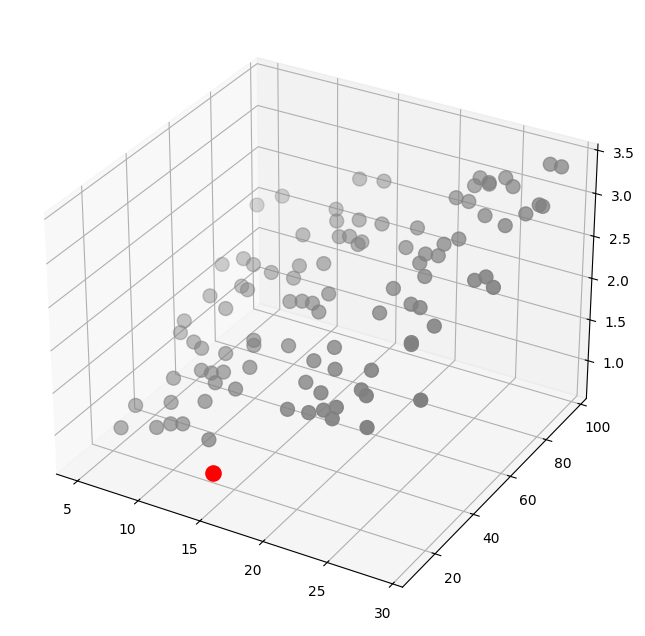

In [199]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.width, df.length, df.price, color = 'gray', s = 100)
ax.scatter3D(width, length, y_pred, color = 'red', s = 120)
#plt.show()